In [16]:
import csv

In [17]:
import pandas as pd
import numpy as np
from collections import Counter

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

In [19]:
#path = '../../bert-cmp/bert/'
#path = '../large-corpus/'
#path = '../mid-corpus/'
#path = '../sparse/'
path = '../java/'

In [20]:
results_df = pd.read_csv(path+'cls_output-methodname/test_results.tsv', header=None, sep='\t')
results_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,5007,5008,5009,5010,5011,5012,5013,5014,5015,5016
0,0.000128,0.000127,0.000398,0.000134,0.000123,0.000123,0.00013,0.000264,0.000119,0.000539,...,6.941205e-08,6.844647e-08,7.020702e-08,7.178438e-08,7.295030e-08,7.087335e-08,7.073331e-08,7.178630e-08,7.144577e-08,6.904517e-08
1,0.000128,0.000127,0.000398,0.000134,0.000123,0.000123,0.00013,0.000264,0.000119,0.000539,...,6.941046e-08,6.844373e-08,7.020441e-08,7.178241e-08,7.294863e-08,7.087092e-08,7.073142e-08,7.178405e-08,7.144318e-08,6.904261e-08
2,0.000128,0.000127,0.000398,0.000134,0.000123,0.000123,0.00013,0.000264,0.000119,0.000539,...,6.941004e-08,6.844312e-08,7.020392e-08,7.178198e-08,7.294826e-08,7.087042e-08,7.073106e-08,7.178348e-08,7.144268e-08,6.904199e-08
3,0.000128,0.000127,0.000398,0.000134,0.000123,0.000123,0.00013,0.000264,0.000119,0.000539,...,6.941229e-08,6.844683e-08,7.020739e-08,7.178463e-08,7.295056e-08,7.087359e-08,7.073361e-08,7.178669e-08,7.144615e-08,6.904554e-08
4,0.000128,0.000127,0.000398,0.000134,0.000123,0.000123,0.00013,0.000264,0.000119,0.000539,...,6.941195e-08,6.844623e-08,7.020684e-08,7.178429e-08,7.295019e-08,7.087311e-08,7.073320e-08,7.178620e-08,7.144553e-08,6.904500e-08
5,0.000128,0.000127,0.000398,0.000134,0.000123,0.000123,0.00013,0.000264,0.000119,0.000539,...,6.941146e-08,6.844537e-08,7.020596e-08,7.178364e-08,7.294961e-08,7.087227e-08,7.073263e-08,7.178542e-08,7.144468e-08,6.904412e-08
6,0.000128,0.000127,0.000398,0.000134,0.000123,0.000123,0.00013,0.000264,0.000119,0.000539,...,6.940996e-08,6.844297e-08,7.020383e-08,7.178195e-08,7.294825e-08,7.087041e-08,7.073097e-08,7.178346e-08,7.144253e-08,6.904190e-08
7,0.000128,0.000127,0.000398,0.000134,0.000123,0.000123,0.00013,0.000264,0.000119,0.000539,...,6.941067e-08,6.844406e-08,7.020481e-08,7.178261e-08,7.294898e-08,7.087125e-08,7.073169e-08,7.178433e-08,7.144346e-08,6.904293e-08
8,0.000128,0.000127,0.000398,0.000134,0.000123,0.000123,0.00013,0.000264,0.000119,0.000539,...,6.941131e-08,6.844529e-08,7.020588e-08,7.178356e-08,7.294953e-08,7.087226e-08,7.073249e-08,7.178521e-08,7.144467e-08,6.904405e-08
9,0.000128,0.000127,0.000398,0.000134,0.000123,0.000123,0.00013,0.000264,0.000119,0.000539,...,6.940967e-08,6.844215e-08,7.020313e-08,7.178137e-08,7.294780e-08,7.086957e-08,7.073047e-08,7.178288e-08,7.144182e-08,6.904115e-08


In [76]:
results_df.shape

(1903, 10656)

In [77]:
#vocab_label_df = pd.read_csv(path+'sparse_fname2_vocab-label.txt', header=None)
vocab_label_df = pd.read_csv(path+'label_vocab.csv', header=None)
vocab_label_df.shape

(10656, 1)

In [78]:
n=10
preds = []; probs = []
for idx, row in results_df.iterrows():
    top_n = list(np.argsort(-row)[:n])
    preds.append(top_n[:n])
    probs.append(row[top_n[:n]])

In [79]:
preds

[[37, 44, 2387, 52, 2388, 73, 51, 74, 2108, 537],
 [677, 883, 136, 8156, 668, 2507, 7957, 2314, 2522, 159],
 [79, 208, 1805, 7106, 517, 119, 2503, 4098, 4000, 2546],
 [2157, 2175, 2236, 7678, 2802, 2452, 5760, 7470, 870, 2780],
 [677, 870, 159, 883, 2236, 2716, 2356, 4512, 2175, 7957],
 [125, 8374, 836, 119, 2476, 2166, 2432, 240, 2168, 2428],
 [2200, 2197, 31, 2290, 2324, 2289, 2327, 2278, 2274, 2412],
 [10495, 7715, 10538, 7629, 773, 7444, 7499, 7306, 7222, 7818],
 [1019, 9178, 1137, 2276, 8453, 2428, 8373, 1145, 1402, 1399],
 [93, 146, 2244, 2249, 1395, 1917, 849, 2250, 2252, 2255],
 [2246, 387, 672, 2355, 1917, 41, 7265, 8274, 10115, 6218],
 [2246, 387, 672, 2355, 1917, 41, 7265, 8274, 10115, 6218],
 [2246, 387, 672, 2355, 1917, 41, 7265, 8274, 10115, 6218],
 [2247, 2197, 93, 3186, 672, 10115, 10306, 2277, 870, 2230],
 [93, 146, 2250, 2252, 2546, 644, 2251, 1917, 2253, 849],
 [2197, 2369, 108, 679, 2344, 2715, 6066, 246, 672, 2504],
 [2262, 2263, 2261, 2264, 2236, 2266, 2213, 679, 

In [80]:
probs

[37      0.764060
 44      0.020856
 2387    0.013921
 52      0.008853
 2388    0.007249
 73      0.004392
 51      0.003539
 74      0.003239
 2108    0.003081
 537     0.002911
 Name: 0, dtype: float64, 677     0.777846
 883     0.034291
 136     0.021677
 8156    0.008344
 668     0.006883
 2507    0.004084
 7957    0.003573
 2314    0.003556
 2522    0.003083
 159     0.002819
 Name: 1, dtype: float64, 79      9.999967e-01
 208     9.331006e-07
 1805    1.774457e-07
 7106    7.214614e-08
 517     7.207380e-08
 119     5.610887e-08
 2503    4.691927e-08
 4098    3.785669e-08
 4000    2.764636e-08
 2546    2.747263e-08
 Name: 2, dtype: float64, 2157    0.997368
 2175    0.000368
 2236    0.000297
 7678    0.000171
 2802    0.000144
 2452    0.000132
 5760    0.000077
 7470    0.000061
 870     0.000039
 2780    0.000037
 Name: 3, dtype: float64, 677     0.998174
 870     0.000394
 159     0.000224
 883     0.000190
 2236    0.000060
 2716    0.000038
 2356    0.000033
 4512    0.000

In [81]:
fs = ['keras', 'sklearn', 'pytorch', 'ansible', 'requests', 'django', 'httpie', 'youtube-dl', 'flask', 'bert']
#fs = ['keras', 'sklearn', 'pytorch']
#fs = ['keras', 'sklearn']
#fs = ['sparse']

In [82]:
#label_dfs = [pd.read_csv(path+f+'_fname2_split_magret_label_val.txt', header=None) for f in fs]
label_dfs = [pd.read_csv(path+f+'_methodname_split_magret_label_val.txt', header=None) for f in fs]

In [83]:
labels= []; labels_str =[]
for label_df in label_dfs:
    for idx, row in label_df.iterrows():
        #labels.append(vocab_label_df.index[vocab_label_df[0]==str(row[0])][0])
        labels_str.append(row[0])

In [84]:
labels

[]

In [85]:
len(labels_str)

1903

In [86]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

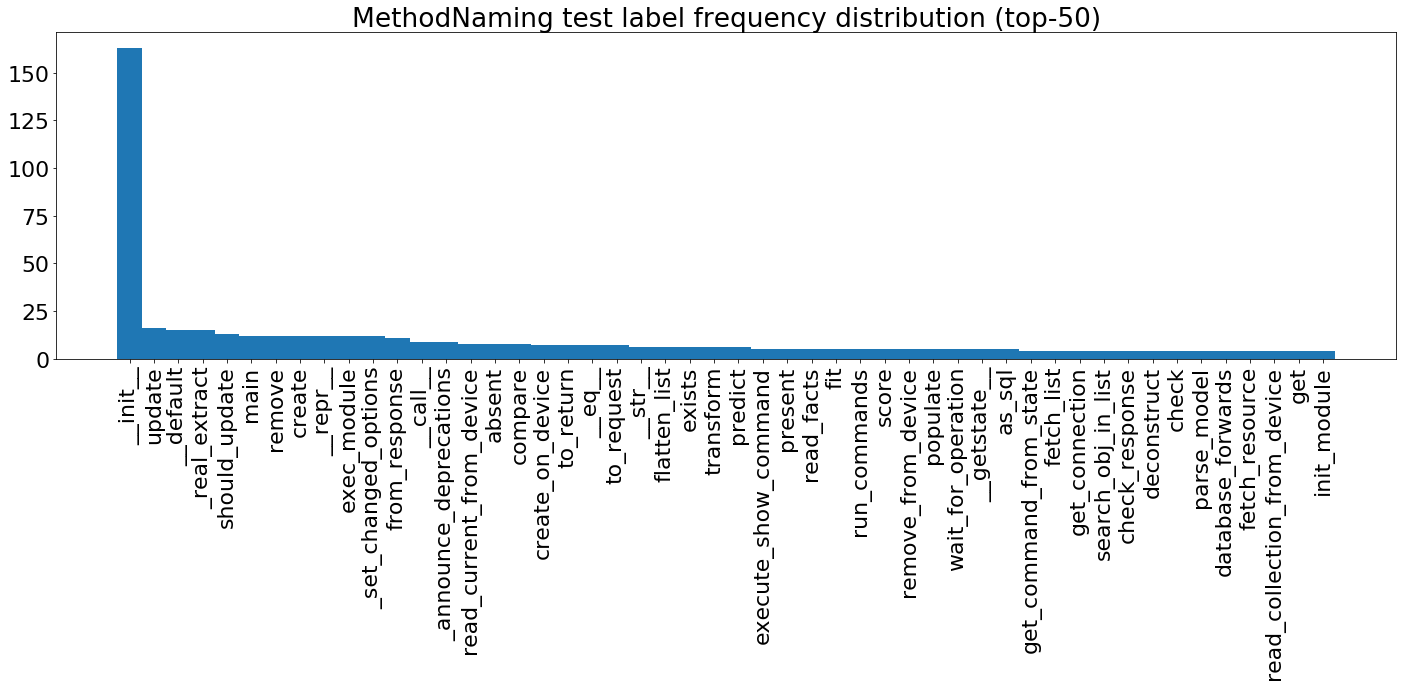

In [87]:
c = Counter(labels_str)
n = 50

plt.figure(figsize=(20,10))
labels, values = zip(*c.most_common(n))

indexes = np.arange(len(labels))
width = 1

plt.title("MethodNaming test label frequency distribution (top-{})".format(n))
plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=90)
plt.tight_layout()
plt.savefig("methodname-lg-freq-top50-test.pdf")
plt.show()

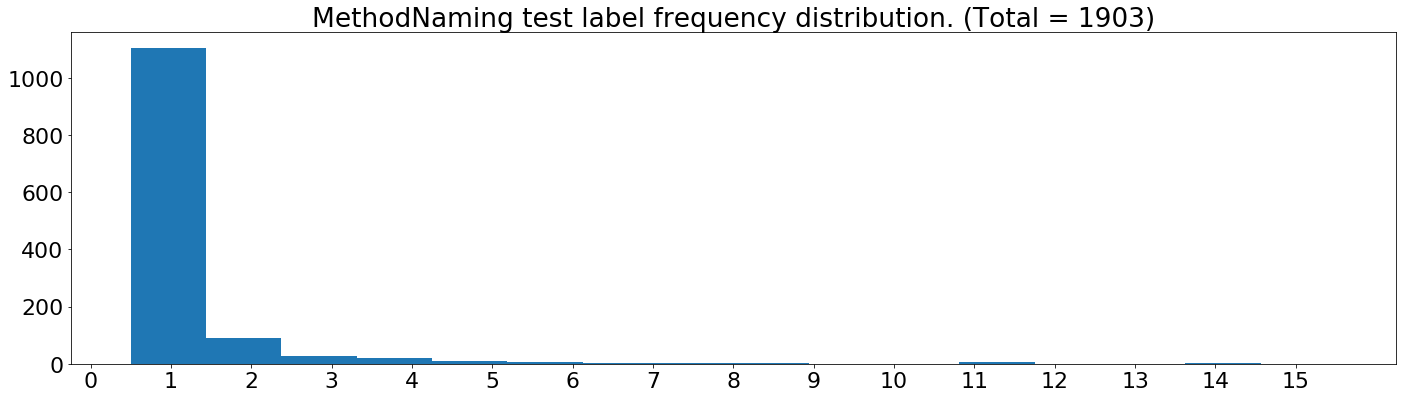

In [88]:
labels, values = zip(*c.most_common())

plt.figure(figsize=(20,6))
plt.title("MethodNaming test label frequency distribution. (Total = {})".format(len(labels_str)))
plt.hist(values[1:],bins=16);
width = 1
plt.xticks([i + width * 0.5 for i in range(16)], [str(i) for i in range(16)]);
plt.tight_layout()
plt.savefig("methodname-test-lg-freq.pdf")

In [89]:
#l_dfs = [pd.read_csv(path+f+'_fname2_split_magret_label.txt', header=None) for f in fs]
l_dfs = [pd.read_csv(path+f+'_methodname_split_magret_label.txt', header=None) for f in fs]
labels_train = []; labels_train_str =[]
for l_df in l_dfs:
    for idx, row in l_df.iterrows():
        #labels_train.append(vocab_label_df.index[vocab_label_df[0]==str(row[0])][0])
        labels_train_str.append(row[0])

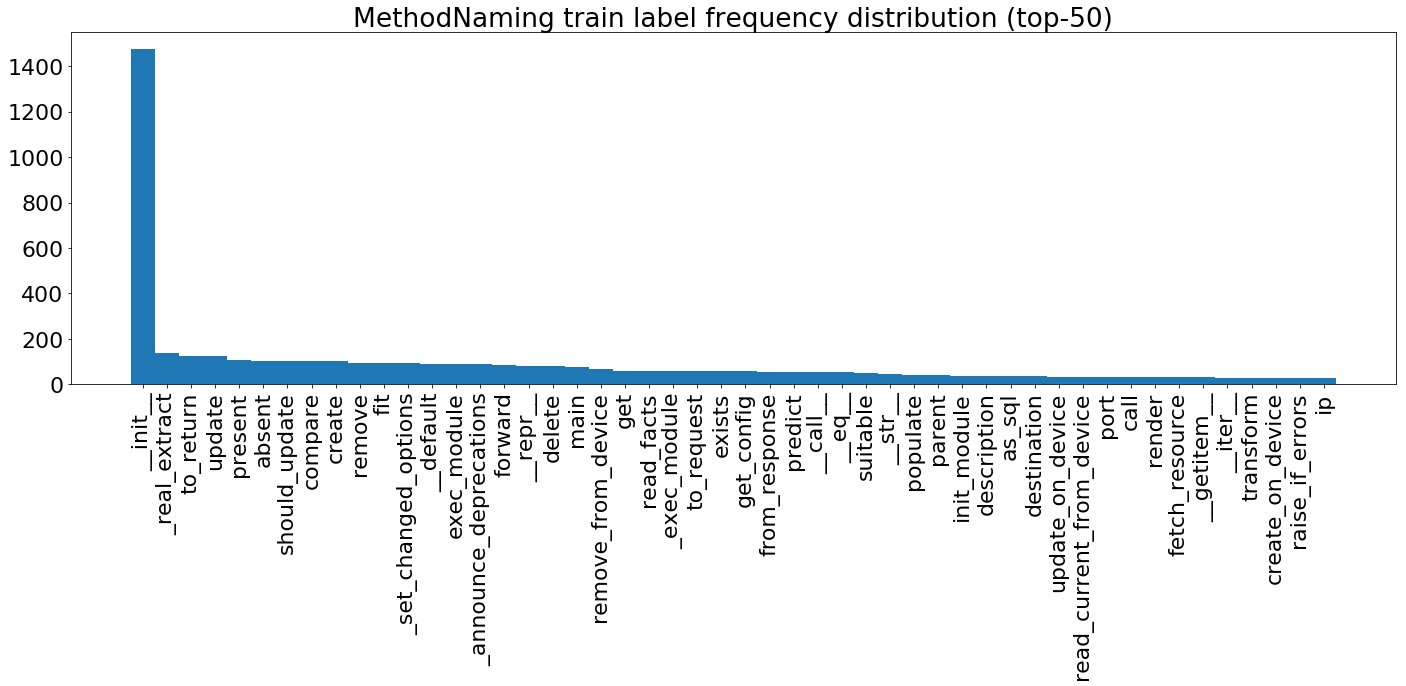

In [90]:
c = Counter(labels_train_str)
n = 50

plt.figure(figsize=(20,10))
labels, values = zip(*c.most_common(n))

indexes = np.arange(len(labels))
width = 1

plt.title("MethodNaming train label frequency distribution (top-{})".format(n))
plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=90)
plt.tight_layout()
plt.savefig("methodname-lg-freq-top50-train.pdf")
plt.show()

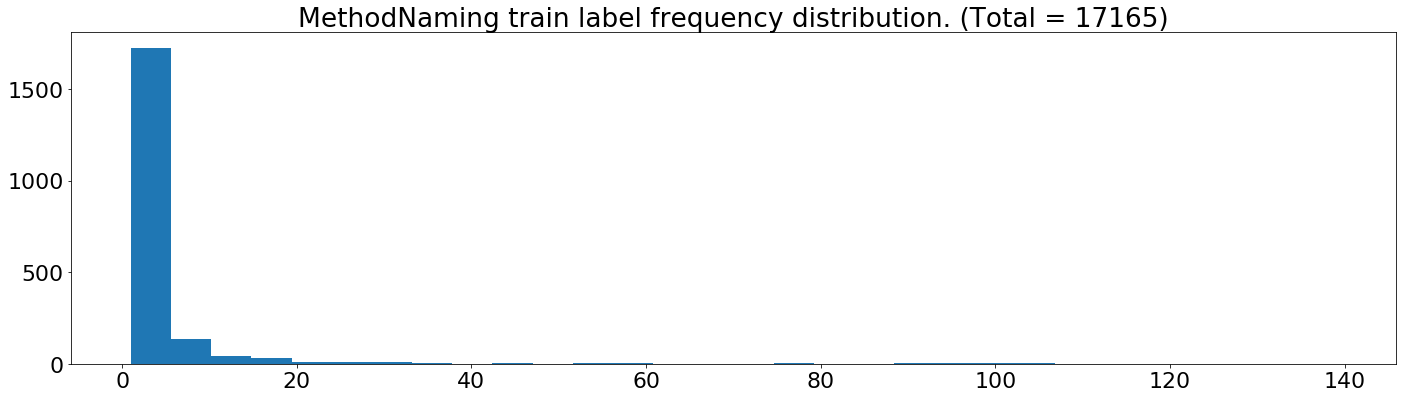

In [91]:
labels, values = zip(*c.most_common(2000))

plt.figure(figsize=(20,6))
plt.title("MethodNaming train label frequency distribution. (Total = {})".format(len(labels_train_str)))
plt.hist(values[1:],bins=30);
width = 1
plt.tight_layout()
#plt.xticks([i + width * 0.5 for i in range(16)], [str(i) for i in range(16)]);
plt.savefig("methodname-train-lg-freq.pdf")

In [92]:
inter = set(labels_train_str).intersection(set(labels_str))

In [93]:
vocab_label_df.loc[0][0]

'uniform_'

In [94]:
#snippet = pd.read_csv(path+'sparse_fname2_split_magret_tk_val.txt', header=None)
#snippet.loc[10][0]

In [95]:
pred_str = []; score = 0; rank = []; 
for idx, r in enumerate(preds):
    #print(snippet.loc[idx][0])
    print("Label =", labels_str[idx])
    preds_ = []
    print("Pred  =")
    correct = False
    
    for i in range(1):
        p = vocab_label_df.loc[r[i]][0]
        if p==labels_str[idx]:
            score +=1
            rank.append(i+1)
            print("---- {}. {} ({})".format(i,p,np.around(probs[idx][r[i]],3)))
            correct = True
        else:
            print("     {}. {} ({})".format(i,p,np.around(probs[idx][r[i]],3)))
        preds_.append(p)
    if correct == False:
        rank.append(i)
    pred_str.append(preds_)
    print()

Label = relu
Pred  =
---- 0. relu (0.764)

Label = get
Pred  =
---- 0. get (0.778)

Label = __init__
Pred  =
---- 0. __init__ (1.0)

Label = deserialize
Pred  =
---- 0. deserialize (0.997)

Label = get
Pred  =
---- 0. get (0.998)

Label = __init__
Pred  =
     0. train (0.079)

Label = compute_mask
Pred  =
---- 0. compute_mask (0.999)

Label = _normalize_device_name
Pred  =
     0. unescape_string_literal (0.128)

Label = print_layer_summary
Pred  =
     0. test_auc_errors (0.042)

Label = NASNetLarge
Pred  =
     0. bind (0.062)

Label = decode_predictions
Pred  =
---- 0. decode_predictions (1.0)

Label = decode_predictions
Pred  =
---- 0. decode_predictions (1.0)

Label = decode_predictions
Pred  =
---- 0. decode_predictions (1.0)

Label = preprocess_input
Pred  =
---- 0. preprocess_input (1.0)

Label = DenseNet201
Pred  =
     0. bind (0.134)

Label = _merge_function
Pred  =
     0. call (0.985)

Label = minimum
Pred  =
     0. multiply (0.202)

Label = dot
Pred  =
     0. maximum (

     0. normalize (0.742)

Label = _check_vocabulary
Pred  =
     0. test_vectorizer_vocab_clone (0.246)

Label = get_feature_names
Pred  =
     0. test_vectorizer_vocab_clone (0.079)

Label = _make_int_array
Pred  =
     0. create_unbound_method (0.033)

Label = idf_
Pred  =
---- 0. idf_ (0.162)

Label = idf_
Pred  =
     0. test_tfidfvectorizer_invalid_idf_attr (0.228)

Label = test_unicode_decode_error
Pred  =
     0. test_word_analyzer_unigrams_and_bigrams (0.775)

Label = test_countvectorizer_custom_vocabulary_repeated_indices
Pred  =
     0. test_countvectorizer_custom_vocabulary_gap_index (0.984)

Label = test_tfidf_vectorizer_setter
Pred  =
     0. test_transformer_idf_setter (0.87)

Label = test_extract_patch_same_size_image
Pred  =
     0. test_reconstruct_patches_perfect_color (0.348)

Label = test_reconstruct_patches_perfect
Pred  =
     0. test_reconstruct_patches_perfect_color (0.993)

Label = test_width_patch
Pred  =
     0. test_chi2_negative (0.503)

Label = test_hash_

---- 0. execute_show_command (0.999)

Label = fix_delta
Pred  =
     0. config_default_igmp_interface (0.265)

Label = get_pim_interface_defaults
Pred  =
     0. _check_list_filter (0.183)

Label = flatten_list
Pred  =
---- 0. flatten_list (1.0)

Label = deactivate_operation
Pred  =
     0. activate_operation (0.204)

Label = execute_show_command
Pred  =
---- 0. execute_show_command (0.999)

Label = parse_mode
Pred  =
     0. parse_port (0.244)

Label = apply_key_map
Pred  =
---- 0. apply_key_map (0.999)

Label = execute_show_command
Pred  =
---- 0. execute_show_command (0.998)

Label = state_absent
Pred  =
---- 0. state_absent (0.851)

Label = get_existing
Pred  =
     0. get_value (0.238)

Label = difference
Pred  =
     0. _get_point_3d (0.387)

Label = parse_system_mtu
Pred  =
     0. parse_hostname (0.384)

Label = parse_remote_server
Pred  =
     0. parse_vrf (0.185)

Label = normalize_area
Pred  =
     0. dotted_netmask (0.115)

Label = get_admin_state
Pred  =
     0. get_comman


Label = hardware_information
Pred  =
---- 0. hardware_information (0.971)

Label = manual_resume
Pred  =
---- 0. manual_resume (0.048)

Label = reverse
Pred  =
     0. manual_resume (0.048)

Label = __init__
Pred  =
---- 0. __init__ (1.0)

Label = mptcp_make_after_break
Pred  =
     0. manual_resume (0.048)

Label = multipath_tcp
Pred  =
     0. manual_resume (0.048)

Label = enhanced_loss_recovery
Pred  =
     0. manual_resume (0.048)

Label = mac_masquerade_address
Pred  =
     0. description (0.478)

Label = __init__
Pred  =
---- 0. __init__ (1.0)

Label = __init__
Pred  =
---- 0. __init__ (1.0)

Label = exec_module
Pred  =
---- 0. exec_module (1.0)

Label = destination_port
Pred  =
     0. destination_address (0.881)

Label = rate_limit
Pred  =
     0. port (0.171)

Label = nat64_enabled
Pred  =
     0. match_across_services (0.083)

Label = persistence_profile
Pred  =
     0. default_persistence_profile (0.389)

Label = sflow_poll_interval
Pred  =
     0. sflow_sampling_rate (0.2

Label = addresses
Pred  =
---- 0. addresses (0.496)

Label = addresses
Pred  =
---- 0. addresses (0.976)

Label = fqdns
Pred  =
---- 0. fqdns (0.981)

Label = create_on_device
Pred  =
---- 0. create_on_device (1.0)

Label = update_on_device
Pred  =
---- 0. update_on_device (1.0)

Label = __init__
Pred  =
---- 0. __init__ (1.0)

Label = parent
Pred  =
---- 0. parent (0.999)

Label = remove
Pred  =
---- 0. remove (1.0)

Label = absent
Pred  =
---- 0. absent (1.0)

Label = http_only
Pred  =
     0. manual_resume (0.048)

Label = parent
Pred  =
---- 0. parent (0.922)

Label = create
Pred  =
---- 0. create (1.0)

Label = max_file_size
Pred  =
     0. tenants (0.513)

Label = exec_module
Pred  =
---- 0. exec_module (1.0)

Label = get_manager
Pred  =
---- 0. get_manager (1.0)

Label = _remove_temporary_cli_script_from_device
Pred  =
     0. remove_from_device (0.998)

Label = _cert_filename
Pred  =
     0. _key_filename (0.397)

Label = compare
Pred  =
---- 0. compare (1.0)

Label = _announce

---- 0. __init__ (1.0)

Label = list_apps
Pred  =
     0. pipeline_description (0.127)

Label = put_bucket_tagging
Pred  =
     0. delete_bucket_tagging (0.205)

Label = wait_for_eni
Pred  =
     0. detach_volume (0.125)

Label = match_tags
Pred  =
     0. match_asg_tags (0.472)

Label = validate_field_level_encryption_id
Pred  =
     0. get_source_port_behavior (0.05)

Label = validate_comment
Pred  =
     0. _create_if_lldp_data (0.045)

Label = update_parameter
Pred  =
     0. _sendback_result (0.115)

Label = _flatten
Pred  =
     0. name_scope (0.04)

Label = warn_if_public_ip_assignment_changed
Pred  =
     0. get_public_ip_address (0.057)

Label = diff
Pred  =
     0. get_flags_from_attributes (0.171)

Label = targets_equal
Pred  =
     0. _is_object_changed (0.262)

Label = resource_exists
Pred  =
---- 0. resource_exists (0.833)

Label = get_distribution_config
Pred  =
     0. get_distribution (0.479)

Label = calculate_s3_path
Pred  =
     0. calculate_local_etag (0.968)

Labe

---- 0. __init__ (1.0)

Label = __init__
Pred  =
---- 0. __init__ (1.0)

Label = _convert_field_to_tz
Pred  =
---- 0. _convert_field_to_tz (0.888)

Label = window_frame_range_start_end
Pred  =
     0. window_frame_start_end (0.377)

Label = convert_binaryfield_value
Pred  =
     0. convert_textfield_value (0.988)

Label = convert_empty_string
Pred  =
     0. converter (0.989)

Label = _savepoint_commit
Pred  =
     0. _prepare_cursor (0.141)

Label = oracle_version
Pred  =
     0. pg_version (0.032)

Label = execute
Pred  =
     0. compiler (0.111)

Label = runshell
Pred  =
     0. set_model (0.146)

Label = _execute_test_db_destruction
Pred  =
     0. _destroy_test_user (0.97)

Label = date_trunc_sql
Pred  =
     0. time_extract_sql (0.451)

Label = adapt_datetimefield_value
Pred  =
---- 0. adapt_datetimefield_value (0.977)

Label = convert_datefield_value
Pred  =
---- 0. convert_datefield_value (0.432)

Label = combine_expression
Pred  =
     0. combine_duration_expression (0.941)

L


Label = as_sql
Pred  =
---- 0. as_sql (1.0)

Label = process_distance
Pred  =
     0. as_sql (0.542)

Label = deconstruct
Pred  =
---- 0. deconstruct (1.0)

Label = get_raster_prep_value
Pred  =
     0. __call__ (0.354)

Label = select_format
Pred  =
---- 0. select_format (0.912)

Label = __init__
Pred  =
---- 0. __init__ (1.0)

Label = unpack
Pred  =
     0. u (0.27)

Label = get_geometry_converter
Pred  =
     0. converter (0.536)

Label = check_relate_argument
Pred  =
     0. has_local_mods (0.044)

Label = supports_spatial_index
Pred  =
     0. get_storage_engine (0.37)

Label = spheroid
Pred  =
     0. datum (0.989)

Label = check_expression_support
Pred  =
     0. _destroy_test_user (0.101)

Label = converter
Pred  =
---- 0. converter (0.997)

Label = _set_z
Pred  =
     0. _set_single (0.221)

Label = contains_properly
Pred  =
     0. contains (0.161)

Label = _set_list
Pred  =
     0. __init__ (1.0)

Label = __or__
Pred  =
---- 0. __or__ (0.96)

Label = num_geom
Pred  =
     0

     0. convert_exception_to_response (0.327)

Label = _new_gnu_trans
Pred  =
     0. _add_local_translations (0.057)

Label = translation
Pred  =
     0. get_uid (0.013)

Label = __init__
Pred  =
---- 0. __init__ (1.0)

Label = __eq__
Pred  =
---- 0. __eq__ (1.0)

Label = items
Pred  =
     0. __iter__ (0.526)

Label = dump_request
Pred  =
     0. _warning (0.179)

Label = finalize_headers
Pred  =
     0. serialize_headers (0.057)

Label = get_auth_plugin
Pred  =
     0. __iter__ (0.06)

Label = get_auth
Pred  =
     0. check_password (0.541)

Label = write_stream
Pred  =
     0. write_stream_with_colors_win_py3 (0.626)

Label = _get_cache_fn
Pred  =
     0. get (0.782)

Label = _setup_socks4a
Pred  =
     0. setproxy (0.113)

Label = connect_ex
Pred  =
     0. connect (0.582)

Label = next_value
Pred  =
     0. _check_type_str (0.057)

Label = _etree_iter
Pred  =
     0. random_birthday (0.048)

Label = compat_xpath
Pred  =
     0. get_devices (0.146)

Label = compat_getenv
Pred  =
 

In [96]:
score/len(preds)

0.41986337362059906

In [97]:
1/np.mean(rank)

2.381727158948686

In [98]:
# Restricted set

In [138]:
per_token_acc = {}; per_token_count = {}
for idx, r in enumerate(preds):
    prediction = vocab_label_df.loc[r[0]][0]
    label = labels_str[idx]
    if per_token_acc.get(label, None) == None:
            per_token_acc[label] = 0
            per_token_count[label] = 0
    per_token_acc[label] += int(prediction == label)
    per_token_count[label] += 1

In [139]:
per_token_acc

{'detect_ipvX_address_usage': 0,
 '_render': 0,
 'get_admin_state': 0,
 'restore_db_instance_from_db_snapshot': 1,
 'one_hot': 0,
 '_savepoint_commit': 0,
 'check_cs_op': 0,
 'check_arg_errcode': 0,
 'get_desired': 0,
 'create_vm_template': 0,
 'next_nonbmp_pos': 0,
 'get_distribution': 1,
 'test_random_search_with_fit_params': 0,
 'content': 0,
 'post': 0,
 'undefine': 1,
 'listify_string_name_or_id': 0,
 'get_stp_enabled_state': 0,
 'frame_size': 0,
 'test_classifier_exceptions': 0,
 '_pooling_function': 2,
 'port_misuse_policy': 0,
 'create_diagnotstics_profile_dict': 0,
 'combine_expression': 0,
 '_remove_prefetched_objects': 1,
 'get_names': 0,
 'apparent_encoding': 0,
 '_get_test_db_name': 0,
 'get_failsafe_timeout': 0,
 'get_update_cmd': 0,
 '_insert_network_data': 0,
 'test_base_zero_n_estimators': 0,
 '__promise__': 0,
 'check_programs': 0,
 'timeout': 2,
 'isvalidlsaoholdinterval': 0,
 'location_key': 0,
 'NASNetLarge': 0,
 'get_command_from_state': 4,
 'main': 11,
 'minimum'

In [140]:
total_per_token_accuracy = {}
per_token_freq = {}
for k,v in per_token_acc.items():
    if per_token_count[k] > 0:
        total_per_token_accuracy[k] = v / per_token_count[k]
        per_token_freq[k] = per_token_count[k] / len(preds)

In [141]:
c = Counter(total_per_token_accuracy)
c.most_common(1000)

[('restore_db_instance_from_db_snapshot', 1.0),
 ('get_distribution', 1.0),
 ('_remove_prefetched_objects', 1.0),
 ('upload_file_to_device', 1.0),
 ('_convert_field_to_tz', 1.0),
 ('has_perms', 1.0),
 ('members', 1.0),
 ('_get_zone', 1.0),
 ('fetch_list', 1.0),
 ('relu', 1.0),
 ('flush', 1.0),
 ('load_config', 1.0),
 ('add_arguments', 1.0),
 ('led', 1.0),
 ('receive_data_chunk', 1.0),
 ('execute_show_command', 1.0),
 ('get_uptime_facts', 1.0),
 ('interval', 1.0),
 ('get_capabilities', 1.0),
 ('present', 1.0),
 ('field_choices', 1.0),
 ('addresses', 1.0),
 ('map_config_to_obj', 1.0),
 ('self_link', 1.0),
 ('handle', 1.0),
 ('get_running_config', 1.0),
 ('y', 1.0),
 ('get_media_speed', 1.0),
 ('_pairwise', 1.0),
 ('update_sub', 1.0),
 ('parse_macaddress', 1.0),
 ('add_command_to_interface', 1.0),
 ('formfield', 1.0),
 ('present_firewall_rule', 1.0),
 ('is_link_local', 1.0),
 ('remove', 1.0),
 ('monitors_list', 1.0),
 ('manual_resume', 1.0),
 ('has_lldp', 1.0),
 ('reset_states', 1.0),
 ('

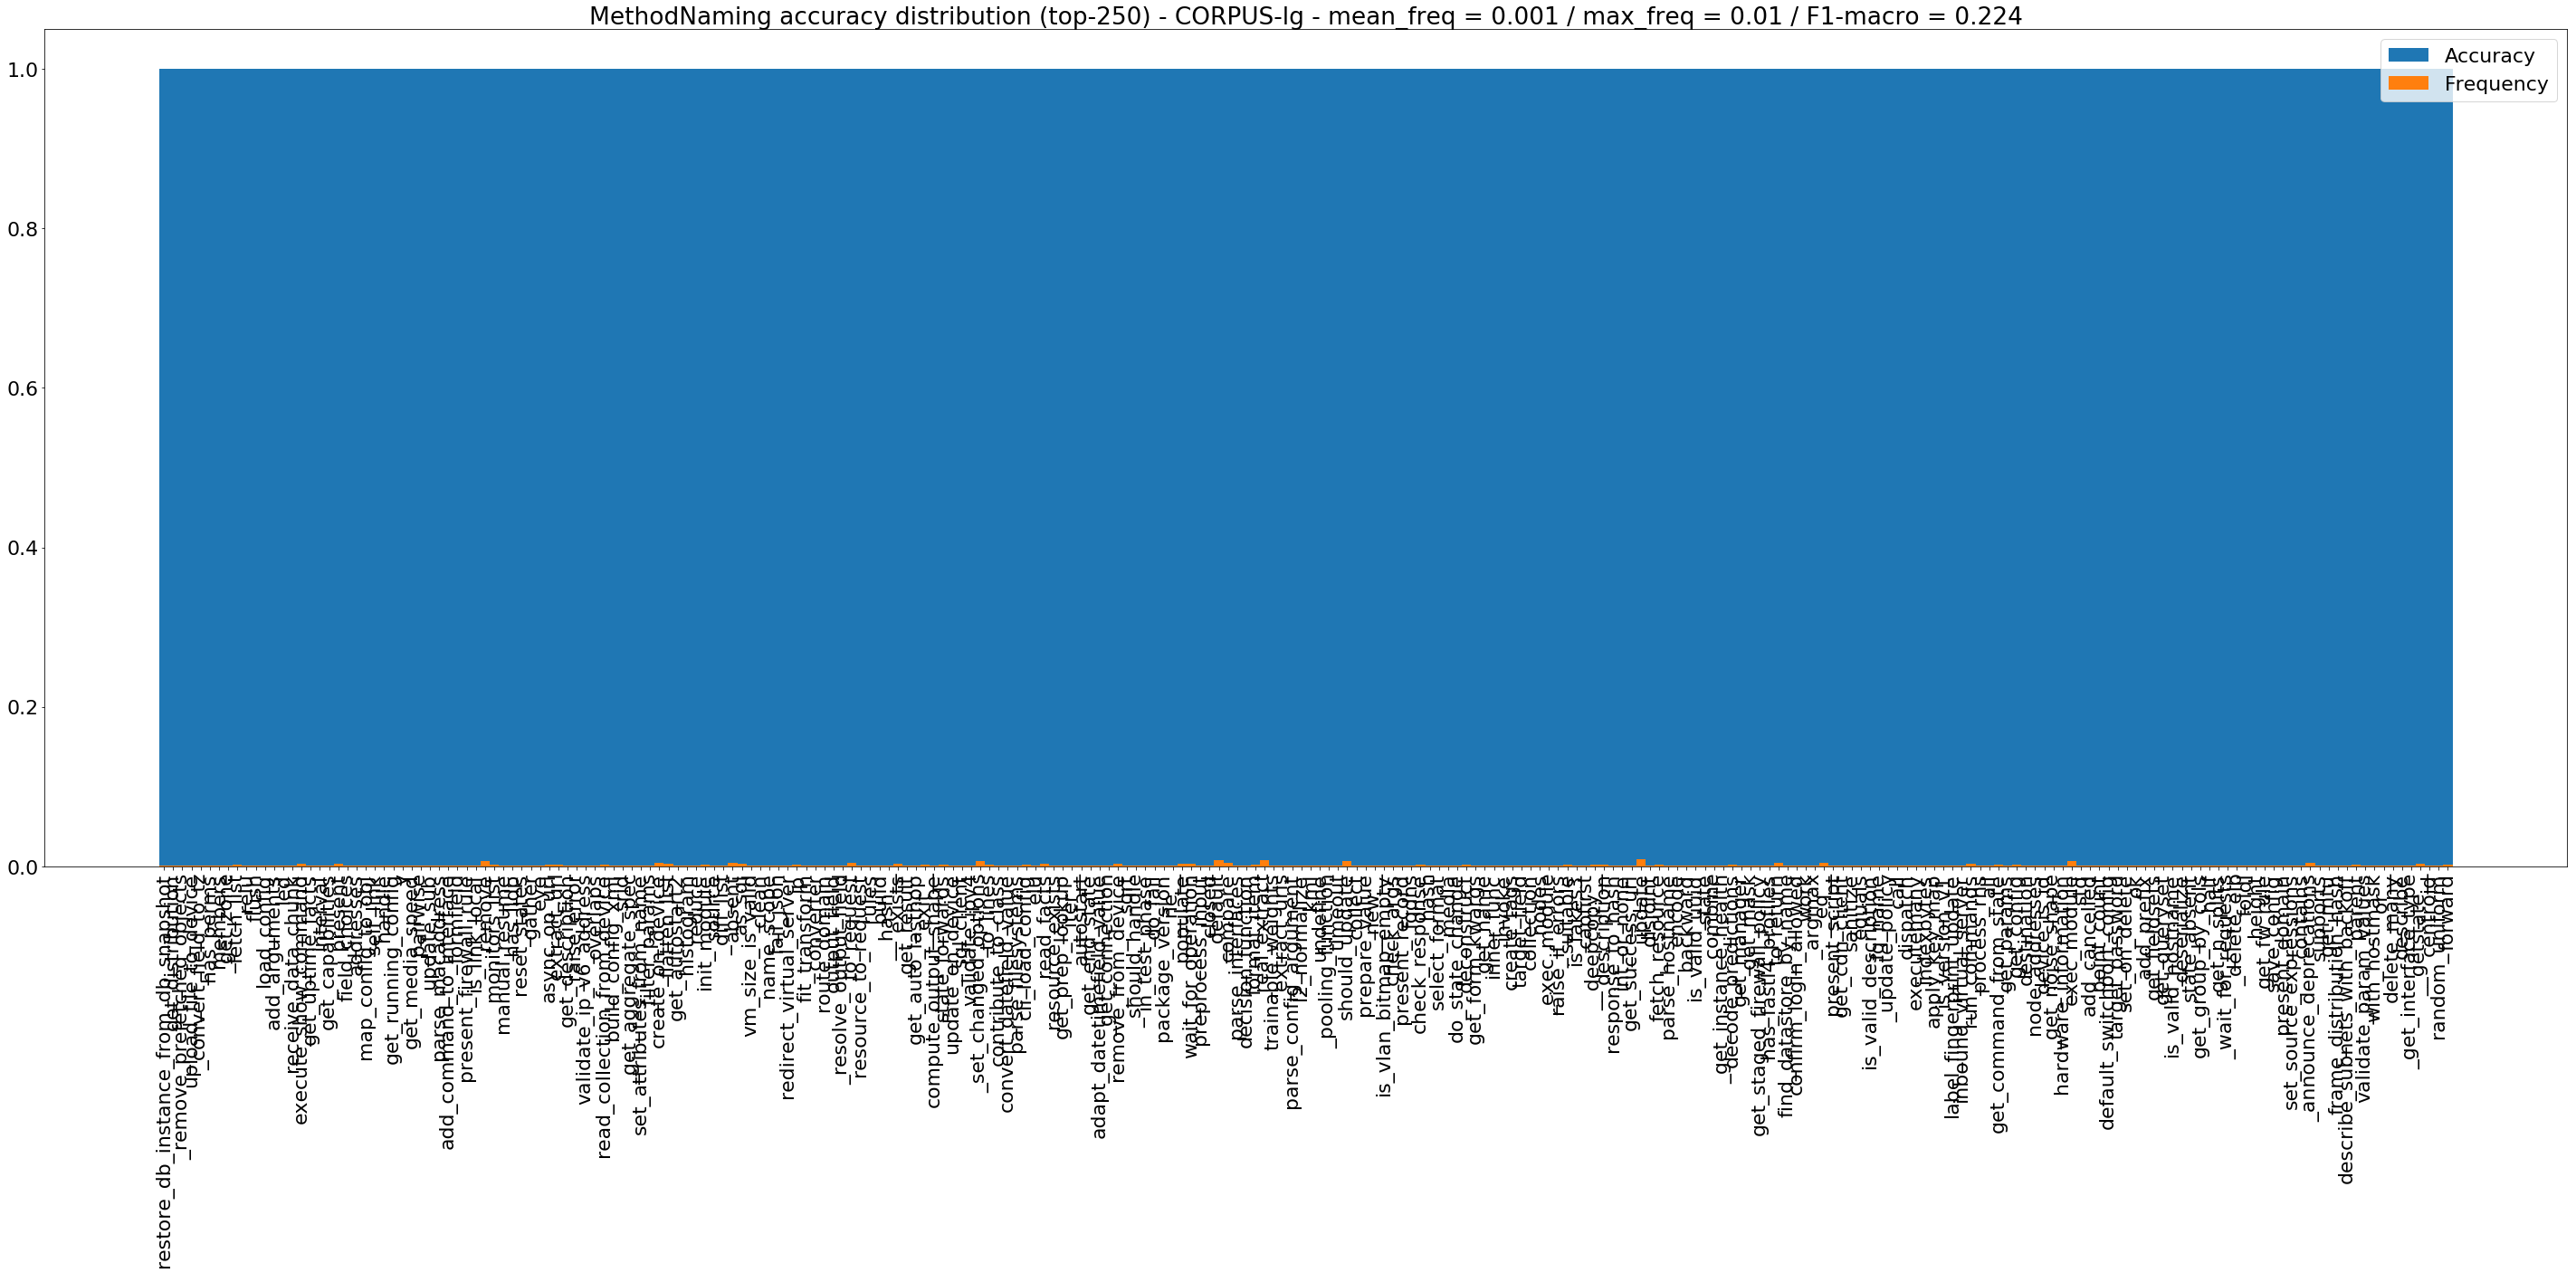

In [142]:
plt.figure(figsize=(40,20))
labels, values = zip(*c.most_common(250))

indexes = np.arange(len(labels))
width = 1

freqs = [per_token_freq[l] for l in labels]

mean_freq = np.mean(list(per_token_freq.values()))
mean_acc = np.mean(list(total_per_token_accuracy.values()))

plt.bar(indexes, values, width, label='Accuracy')
plt.bar(indexes, freqs, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MethodNaming accuracy distribution (top-250) - CORPUS-lg - mean_freq = {:.3f} / max_freq = {:.2f} / F1-macro = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
#plt.savefig('accuracy-dist-methodname-lg-top250.pdf')

plt.show()

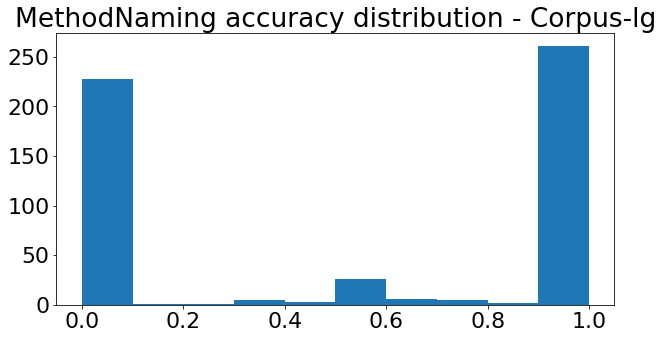

In [149]:
plt.figure(figsize=(10,5))
plt.title('MethodNaming accuracy distribution - Corpus-lg')
plt.hist([c[k] for k in inter])
plt.savefig('methodname-acc-dist-lg.pdf')

In [104]:
d = Counter(per_token_freq)
d.most_common(100)

[('__init__', 0.08565423016290068),
 ('update', 0.008407777193904361),
 ('__default', 0.007882291119285338),
 ('_real_extract', 0.007882291119285338),
 ('should_update', 0.006831318970047294),
 ('main', 0.006305832895428271),
 ('remove', 0.006305832895428271),
 ('__repr__', 0.006305832895428271),
 ('_set_changed_options', 0.006305832895428271),
 ('create', 0.006305832895428271),
 ('exec_module', 0.006305832895428271),
 ('from_response', 0.005780346820809248),
 ('__call__', 0.004729374671571204),
 ('_announce_deprecations', 0.004729374671571204),
 ('absent', 0.004203888596952181),
 ('compare', 0.004203888596952181),
 ('read_current_from_device', 0.004203888596952181),
 ('create_on_device', 0.0036784025223331584),
 ('to_request', 0.0036784025223331584),
 ('to_return', 0.0036784025223331584),
 ('__eq__', 0.0036784025223331584),
 ('flatten_list', 0.0031529164477141357),
 ('exists', 0.0031529164477141357),
 ('transform', 0.0031529164477141357),
 ('predict', 0.0031529164477141357),
 ('__str_

In [105]:
Counter(labels_train_str).most_common(100)

[('__init__', 1475),
 ('_real_extract', 139),
 ('to_return', 127),
 ('update', 123),
 ('present', 106),
 ('absent', 103),
 ('should_update', 102),
 ('compare', 101),
 ('create', 101),
 ('remove', 96),
 ('fit', 94),
 ('_set_changed_options', 93),
 ('__default', 92),
 ('exec_module', 91),
 ('_announce_deprecations', 89),
 ('forward', 84),
 ('__repr__', 82),
 ('delete', 79),
 ('main', 75),
 ('remove_from_device', 66),
 ('get', 60),
 ('read_facts', 59),
 ('_exec_module', 59),
 ('to_request', 58),
 ('exists', 58),
 ('get_config', 57),
 ('from_response', 56),
 ('predict', 55),
 ('__call__', 54),
 ('__eq__', 53),
 ('suitable', 52),
 ('__str__', 46),
 ('populate', 43),
 ('parent', 43),
 ('init_module', 36),
 ('description', 35),
 ('as_sql', 35),
 ('destination', 35),
 ('update_on_device', 34),
 ('read_current_from_device', 34),
 ('port', 32),
 ('call', 32),
 ('render', 32),
 ('fetch_resource', 31),
 ('__getitem__', 31),
 ('__iter__', 30),
 ('transform', 29),
 ('create_on_device', 29),
 ('raise

In [106]:
len(labels_train_str)

17165

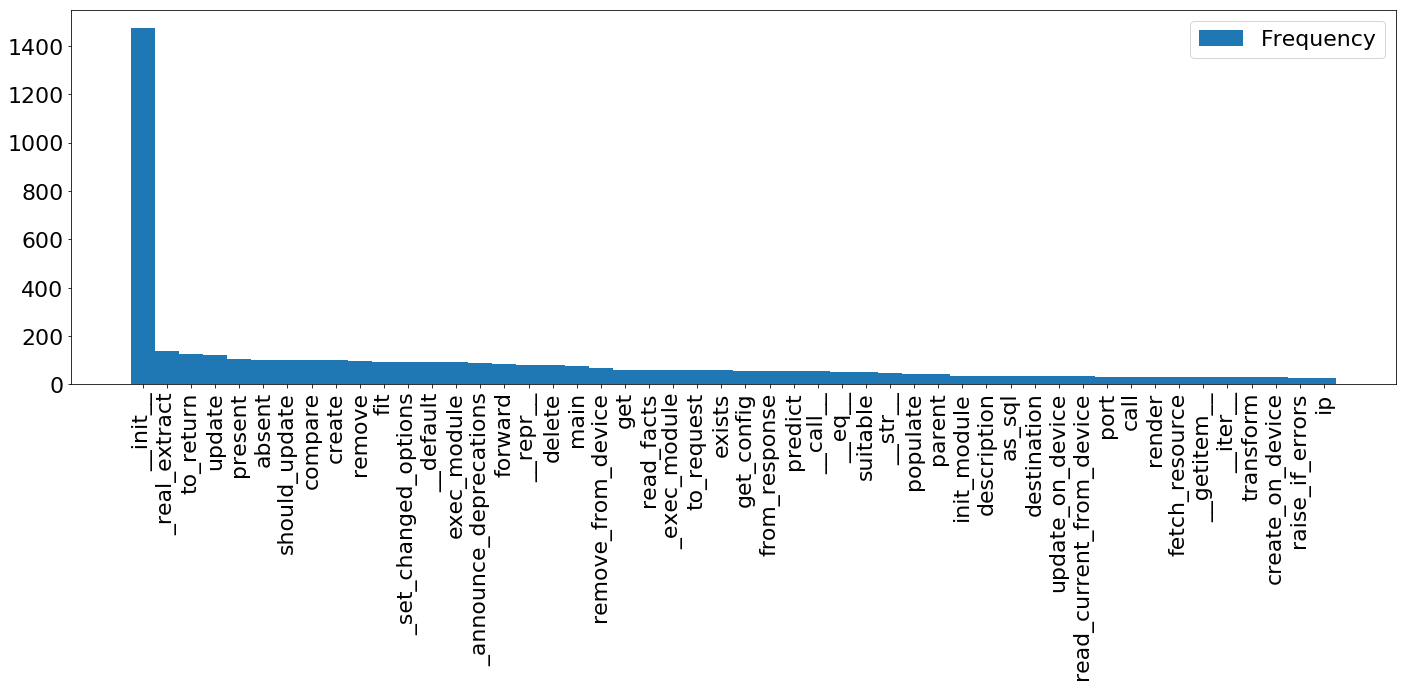

In [107]:
plt.figure(figsize=(20,10))
labels, values = zip(*Counter(labels_train_str).most_common(50))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]
mean_acc = np.mean(accuracies)

#plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
#plt.title('BERT (50k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
#plt.savefig('BERT-freq-50k_epochs_top100.png')
plt.show()

In [108]:
mean_acc

0.870199634380616

In [109]:
len(d)

1278

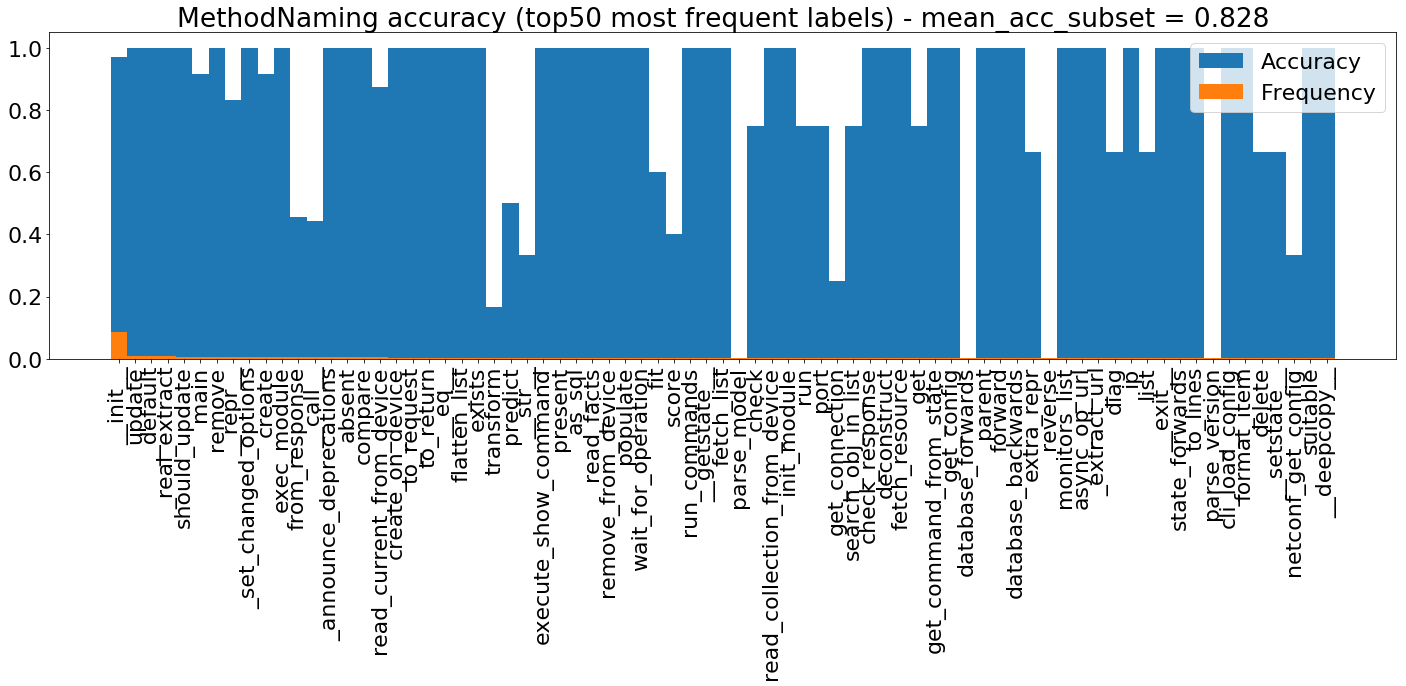

In [111]:
plt.figure(figsize=(20,10))
labels, values = zip(*d.most_common(75))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]
mean_acc = np.mean(accuracies)

plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MethodNaming accuracy (top50 most frequent labels) - mean_acc_subset = {:.3f}'.format(mean_acc))
plt.legend()
plt.tight_layout()
plt.savefig('top-freq-acc_top50.pdf')
plt.show()

In [112]:
label_count = Counter(labels_str)
train_label_count = Counter(labels_train_str)

In [113]:
total = sum(label_count.values(), 0.0)
for key in label_count:
    label_count[key] /= total

In [114]:
total = sum(train_label_count.values(), 0.0)
for key in train_label_count:
    train_label_count[key] /= total

In [115]:
trn_cnt =  Counter(labels_train_str)
inter_labels = [l for l in labels_str if (l in inter) and (trn_cnt[l]>5)]
inter_label_count = Counter(inter_labels)
total = sum(inter_label_count.values(), 0.0)
for key in inter_label_count:
    inter_label_count[key] /= total

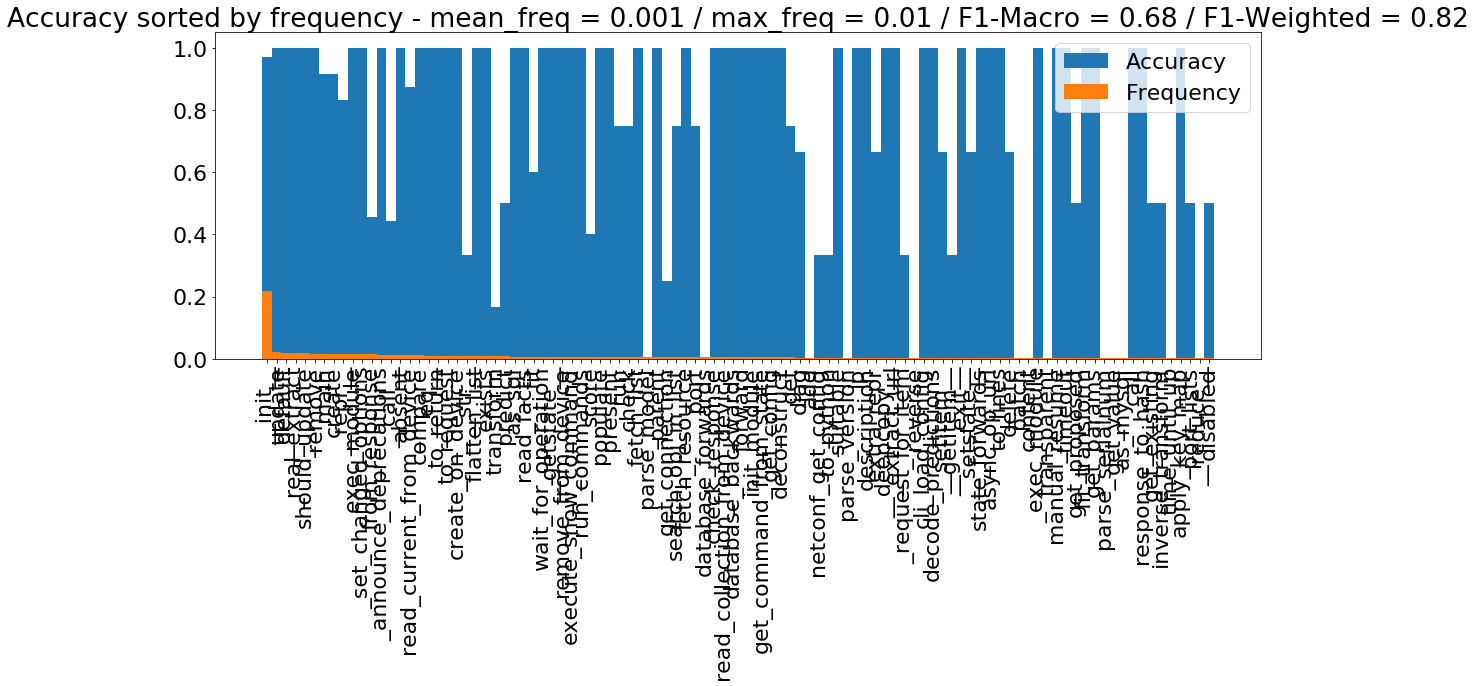

In [116]:
plt.figure(figsize=(20,10))
labels, values = zip(*inter_label_count.most_common(100))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]
all_acc = [c[tok] for tok in inter_label_count.keys()]
mean_acc = np.mean(all_acc)
inter_acc = np.sum([total_per_token_accuracy[key] * inter_label_count[key]  for key in inter_label_count])


plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('Accuracy sorted by frequency - mean_freq = {:.3f} / max_freq = {:.2f} / F1-Macro = {:.2f} / F1-Weighted = {:.2f}'.format(mean_freq, np.max(freqs), mean_acc, inter_acc))
plt.legend()
plt.tight_layout()
#plt.savefig('BERT-freq-50k_epochs_top100.png')
plt.show()

In [117]:
all_acc = [c[tok] for tok in inter_label_count.keys()]
mean_acc = np.mean(all_acc)
mean_acc

0.6805196149768681

In [118]:
inter_acc = np.sum([total_per_token_accuracy[key] * inter_label_count[key]  for key in inter_label_count])
inter_acc

0.8164893617021276

In [119]:
weighted_acc = np.sum([total_per_token_accuracy[key] * label_count[key]  for key in label_count])
weighted_acc

0.41986337362059906

In [120]:
novel_labels = [l for l in labels_str if (l in labels_str) and (l not in labels_train_str)]
novel_label_count = Counter(novel_labels)
total = sum(novel_label_count.values(), 0.0)
for key in novel_label_count:
    novel_label_count[key] /= total

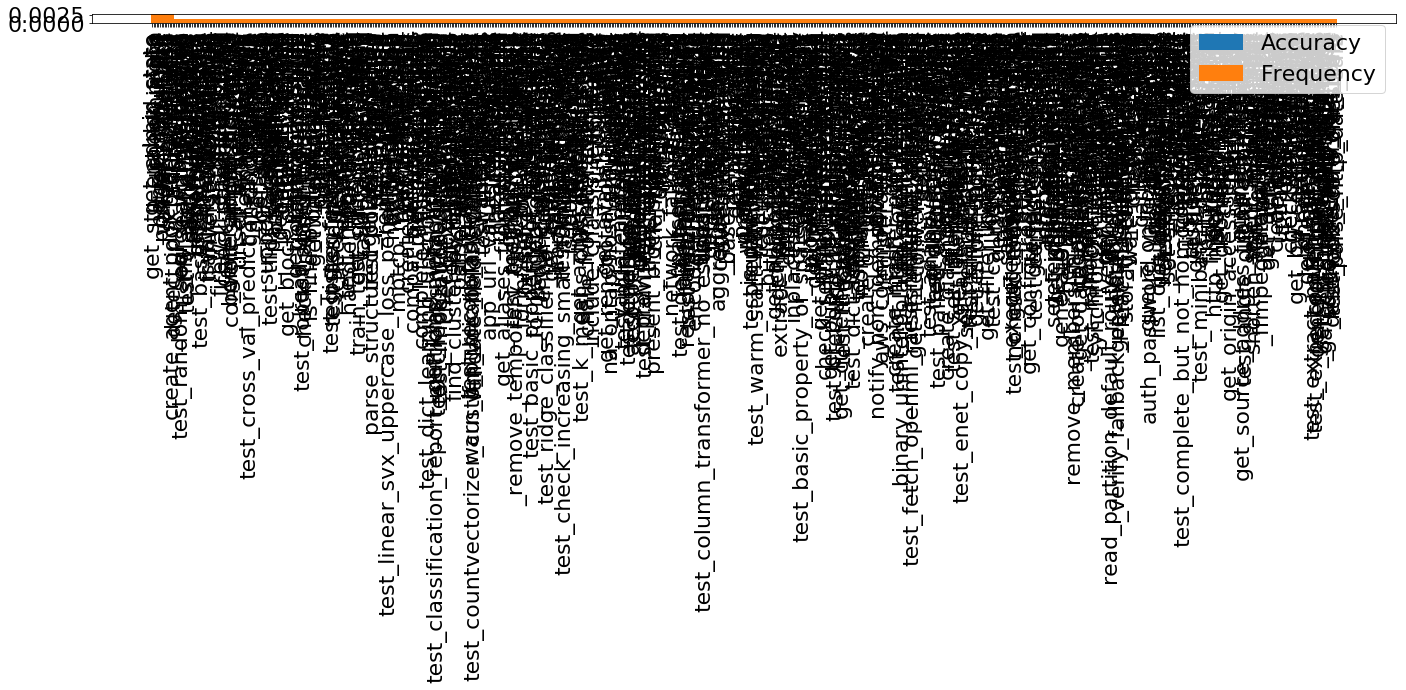

In [121]:
plt.figure(figsize=(20,10))
labels, values = zip(*novel_label_count.most_common(1000))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]

plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
#plt.title('BERT (50k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
#plt.savefig('BERT-freq-50k_epochs_top100.png')

plt.show()

In [122]:
len(indexes)

740

In [123]:
labels, values = zip(*inter_label_count.most_common(2000))
accuracies = [c[tok] for tok in labels]

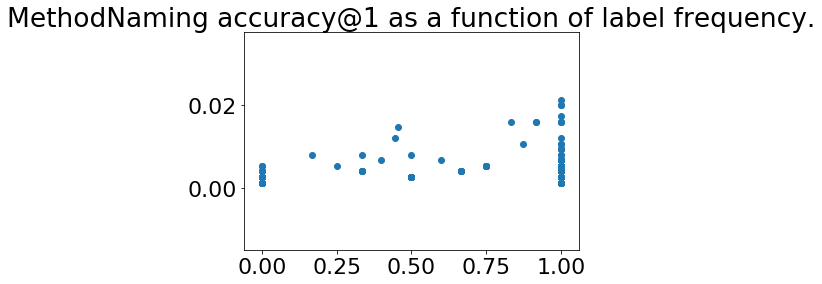

In [124]:
plt.title('MethodNaming accuracy@1 as a function of label frequency.')
plt.scatter(accuracies[1:], values[1:])
#plt.savefig('accuracy-freq-methodname.pdf')

In [125]:
split_labels = [l.split('_') for l in list(vocab_label_df[0])]
#split_labels = [item for sublist in split_labels for item in sublist]

In [126]:
per_token_acc = {}; per_token_count = {}
for idx, r in enumerate(preds):
    prediction = vocab_label_df.loc[r[0]][0]
    pred_split = prediction.split('_')
    label = labels_str[idx]
    if per_token_acc.get(label, None) == None:
            per_token_acc[label] = 0
            per_token_count[label] = 0
    split_label = label.split('_')
    #commonalities = set(split_label).intersection(set(pred_split))
    common = 0
    for p in pred_split:
        if p in split_label:
            common += 1
    per_token_acc[label] += common / len(pred_split)
    per_token_count[label] += 1

In [127]:
total_per_token_accuracy = {}
per_token_freq = {}
for k,v in per_token_acc.items():
    if per_token_count[k] > 0:
        total_per_token_accuracy[k] = v / per_token_count[k]
        per_token_freq[k] = per_token_count[k] / len(preds)

In [128]:
inter_acc = np.sum([total_per_token_accuracy[key] * inter_label_count[key]  for key in inter_label_count])
inter_acc

0.8515514184397163

## from scipy import io

In [84]:
m = io.mmread('../sparse/adj/1_sparse_fname2_split_magret_adj.mtx').toarray()

In [85]:
import matplotlib.pyplot as plt

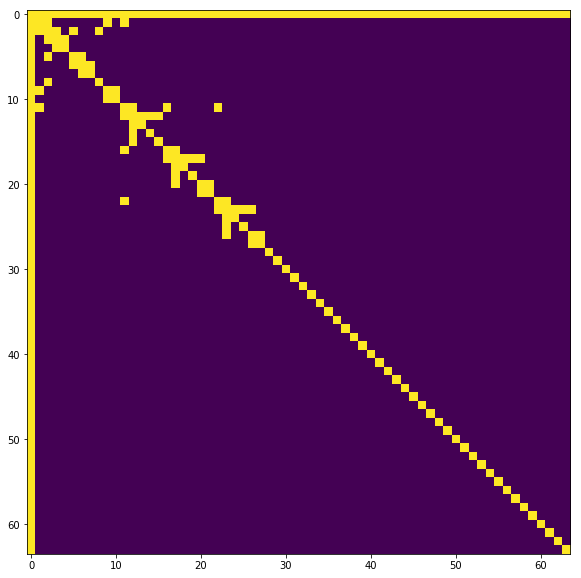

In [86]:
plt.figure(figsize=(10,10))
plt.imshow(m)

In [87]:
np.count_nonzero(m[56,:])

2

In [88]:
eye = np.eye(64)

In [89]:
shuffle_idx = np.random.permutation(20)

In [90]:
G = nx.from_numpy_matrix(m)
#shuffled_adj = nx.adjacency_matrix(G, nodelist=shuffle_idx).todense()

In [96]:
emb_len = len(snippet.loc[1][0].split(' '))
emb_len

20

In [97]:
G = nx.from_numpy_matrix(m[:emb_len,:emb_len])

In [98]:
edges = list(G.edges(0))
G.remove_edges_from(edges)

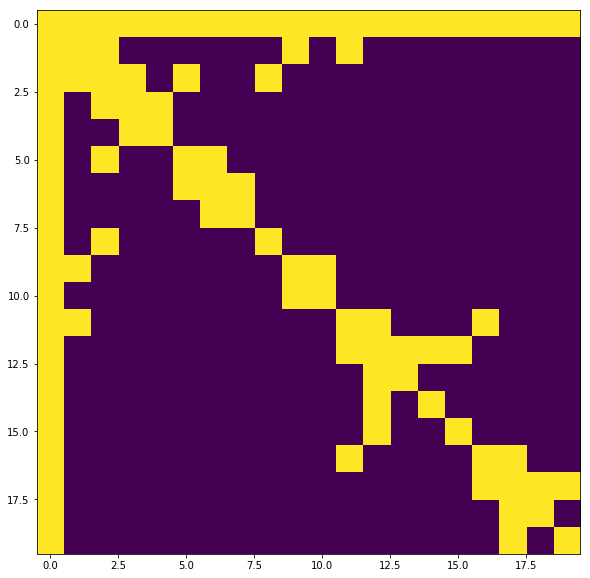

In [99]:
plt.figure(figsize=(10,10))
plt.imshow(m[:emb_len,:emb_len])

In [101]:
snippet.loc[1][0].split(' ')

['[CLS]',
 'FunctionDef',
 'arguments',
 'arg',
 'self',
 'arg',
 'model',
 'For',
 'Name',
 'callback',
 'Attribute',
 'callbacks',
 'Name',
 'Expr',
 'Call',
 'Attribute',
 'set',
 'model',
 'Name',
 'Name']

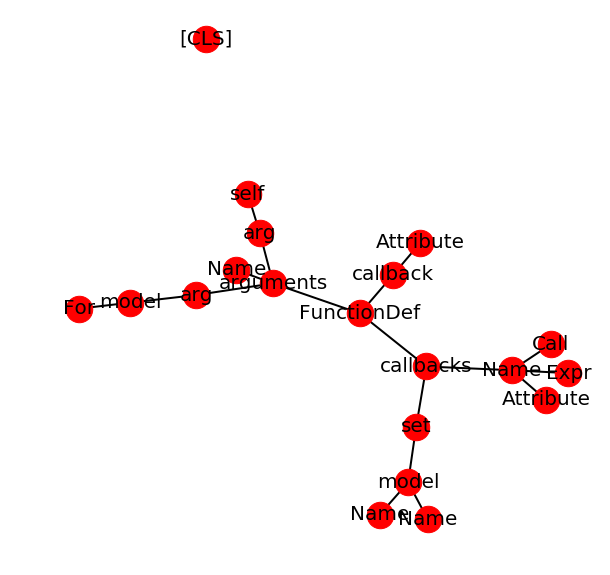

In [103]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, width=2)
# labels
nx.draw_networkx_labels(G, pos, labels=dict(zip(range(emb_len),snippet.loc[1][0].split(' '))), font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

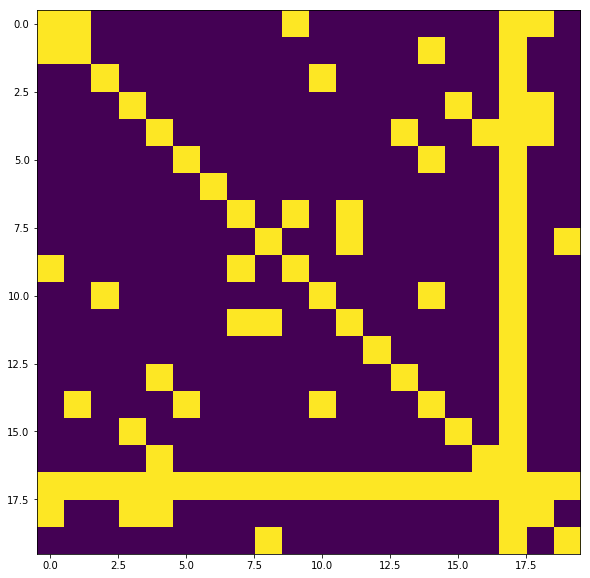

In [72]:
plt.figure(figsize=(10,10))
plt.imshow(shuffled_adj)
#plt.xticks(range(20), idx);

In [33]:
eye[:len(shuffled_adj), :len(shuffled_adj)] = shuffled_adj

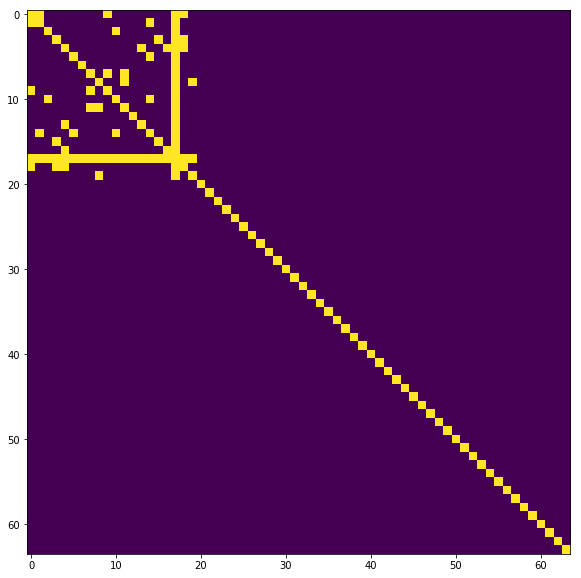

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(eye)

In [55]:
enc_df = pd.read_csv(path+'cls_output-embed/encoder_results.tsv', header=None, sep='\t')
enc_df.shape

(4800, 768)

In [104]:
embeddings = enc_df.values.reshape((75,64,768))

In [74]:
snippet.loc[5][0], len(snippet.loc[5][0].split(' '))

('[CLS] FunctionDef arguments arg self arg minval arg maxval arg seed UnaryOp USub Num Num NameConstant Assign Attribute minval Name Name Assign Attribute maxval Name Name Assign Attribute seed Name Name',
 31)

In [76]:
snippet.loc[11][0], len(snippet.loc[11][0].split(' '))

('[CLS] FunctionDef arguments arg self arg sequence arg use multiprocessing arg shuffle NameConstant NameConstant Expr Call Attribute init Call Name Name Name Name Name Assign Attribute shuffle Name Name',
 29)

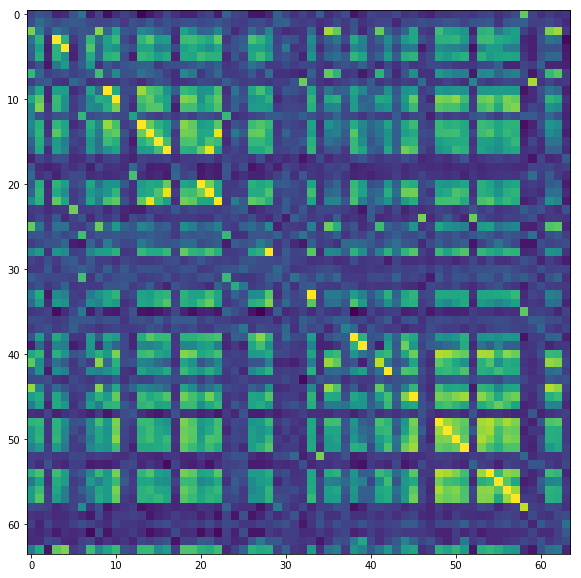

In [69]:
sim = np.dot(embeddings[:,5], embeddings[:,11].T)
plt.figure(figsize=(10,10))
plt.imshow(sim)

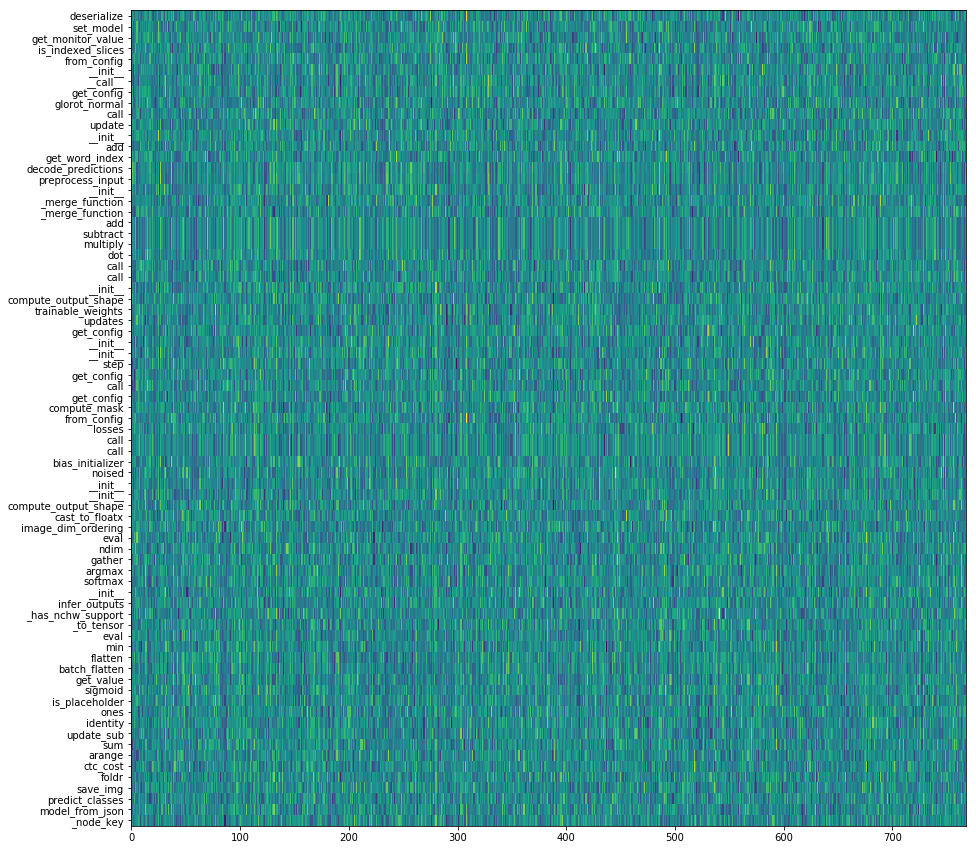

In [105]:
plt.figure(figsize=(20,15))
plt.imshow(embeddings[:,0], aspect=10)
plt.yticks(range(75), labels_str);

In [106]:
embeddings.shape

(75, 64, 768)

In [107]:
from sklearn.metrics.pairwise import cosine_similarity

In [110]:
cos = cosine_similarity(embeddings[:,0])
cos.shape

(75, 75)

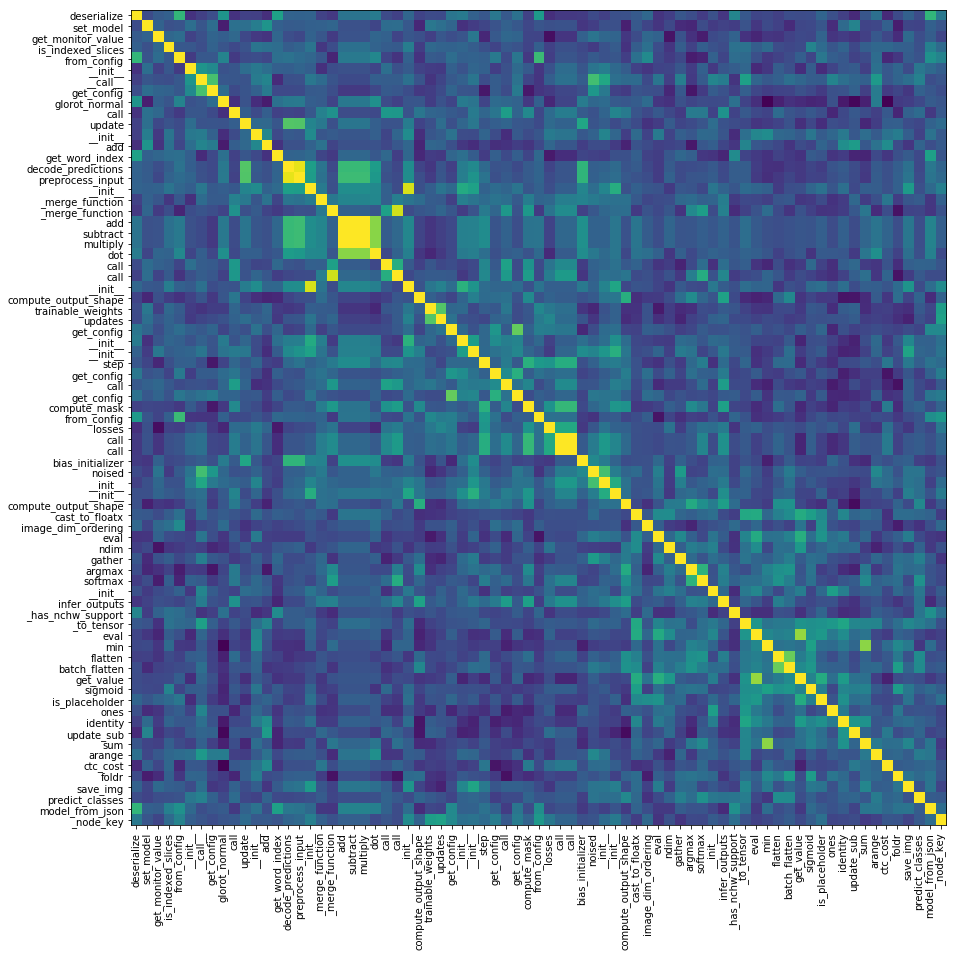

In [114]:
plt.figure(figsize=(20,15))
plt.imshow(cos)
plt.yticks(range(75), labels_str);
plt.xticks(range(75), labels_str, rotation=90);

In [148]:
score_sim = 0
for i in range(75):
    print(label_df.loc[i][0])
    rnk = 7
    ranked = np.argsort(cos[i])[::-1][:rnk+1]
    r = preds[i]
    match = False
    
    for j in range(rnk):
        if (label_df.loc[ranked[0]][0]==label_df.loc[ranked[j+1]][0]) & (match == False):
            score_sim +=1
            match==True
        sim_pred = label_df.loc[ranked[j+1]][0]
        pred_pred = vocab_label_df.loc[r[j]][0]
        print("--- s: {}  p: {}".format(sim_pred, pred_pred))
    print()

deserialize
--- s: from_config  p: deserialize
--- s: model_from_json  p: from_config
--- s: get_word_index  p: get_config
--- s: from_config  p: in_test_phase
--- s: glorot_normal  p: model_from_config
--- s: _has_nchw_support  p: _postprocess_conv3d_output
--- s: dot  p: _prepare_name

set_model
--- s: add  p: __init__
--- s: update_sub  p: set_params
--- s: __init__  p: on_epoch_end
--- s: trainable_weights  p: on_train_end
--- s: call  p: on_train_begin
--- s: update  p: predict
--- s: updates  p: __enter__

get_monitor_value
--- s: __init__  p: on_train_begin
--- s: noised  p: on_epoch_end
--- s: from_config  p: __init__
--- s: save_img  p: on_train_end
--- s: image_dim_ordering  p: get_config
--- s: call  p: on_batch_end
--- s: __init__  p: validate_file

is_indexed_slices
--- s: sigmoid  p: deserialize
--- s: model_from_json  p: from_config
--- s: __init__  p: stop_gradient
--- s: __init__  p: _prepare_name
--- s: __init__  p: get_config
--- s: _to_tensor  p: is_sparse
--- s: _h


predict_classes
--- s: softmax  p: argmax
--- s: flatten  p: predict_proba
--- s: batch_flatten  p: compute_output_shape
--- s: compute_output_shape  p: argmin
--- s: __call__  p: losses
--- s: gather  p: cell
--- s: _to_tensor  p: one_hot

model_from_json
--- s: deserialize  p: get
--- s: get_word_index  p: deserialize
--- s: from_config  p: on_epoch_end
--- s: _has_nchw_support  p: model_from_yaml
--- s: from_config  p: model_from_config
--- s: get_config  p: from_config
--- s: add  p: forward

_node_key
--- s: updates  p: _make_node_key
--- s: trainable_weights  p: from_config
--- s: from_config  p: is_keras_tensor
--- s: __init__  p: raise_duplicate_arg_error
--- s: get_config  p: get_output_shape_at
--- s: from_config  p: get_uid
--- s: __init__  p: count_params



In [149]:
score_sim/75

0.8533333333333334